<a href="https://colab.research.google.com/github/minukjeong/python/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion mnist 데이터 불러오기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  #패션 minst데이터 다운
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()   #데이터를 받은 후 Train / test와 image / label을 나눔

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)   # 각 이미지의 형태를 본다. train에 60000장 test에 10000장 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']   #레이블 이름 달기

In [5]:
# 데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0                                          #0 ~ 255 사이의 값을 가지는 train, test 데이터들을 0.0 ~ 1.0 사이의 값으로 변환해줌

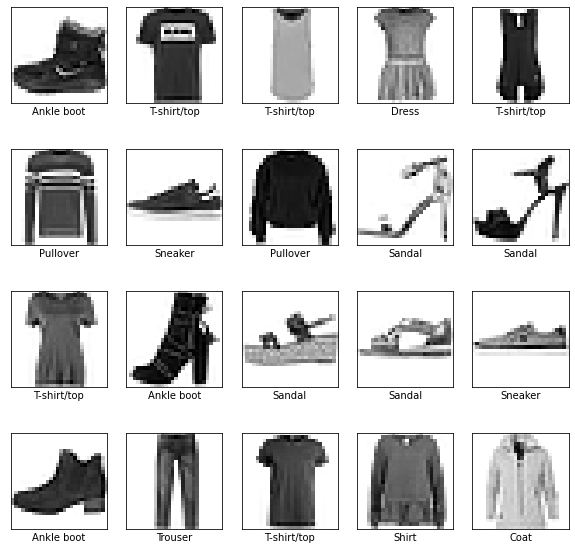

In [6]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()                                                 #train 데이터 모델 확인하기

#하이퍼 파라미터 튜닝 이 후 훈련 시키기

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10)      #layer층 입력층을 128개로 설정, activation function은 Relu로 지정
                                                        #layer 중간층을 50개로 만든 후 activation function은 Relu로 지정
])                                                      #출력층 layer를 10개로 설정
learning_rate = 0.001   
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),       #learning_rate 값을 0.001로 설정
              metrics=['accuracy'])     
model.summary()                                                        

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 50)                6450      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 107,440
Trainable params: 107,440
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
model.fit = model.fit(train_images, train_labels,
                                  epochs=20,
                                  batch_size=128,
                                  verbose=2)                                                   #epochs = 20, batch_size = 128, verbose = 2로 설정 정확도 93% 나옴

Epoch 1/20
469/469 - 2s - loss: 0.5551 - accuracy: 0.8063 - 2s/epoch - 5ms/step
Epoch 2/20
469/469 - 2s - loss: 0.3925 - accuracy: 0.8584 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.3527 - accuracy: 0.8706 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 2s - loss: 0.3261 - accuracy: 0.8814 - 2s/epoch - 4ms/step
Epoch 5/20
469/469 - 2s - loss: 0.3097 - accuracy: 0.8876 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.2946 - accuracy: 0.8921 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.2810 - accuracy: 0.8968 - 2s/epoch - 4ms/step
Epoch 8/20
469/469 - 2s - loss: 0.2714 - accuracy: 0.9002 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 2s - loss: 0.2608 - accuracy: 0.9036 - 2s/epoch - 4ms/step
Epoch 10/20
469/469 - 2s - loss: 0.2545 - accuracy: 0.9051 - 2s/epoch - 4ms/step
Epoch 11/20
469/469 - 2s - loss: 0.2429 - accuracy: 0.9086 - 2s/epoch - 4ms/step
Epoch 12/20
469/469 - 2s - loss: 0.2381 - accuracy: 0.9117 - 2s/epoch - 3ms/step
Epoch 13/20
469/469 - 2s - loss: 0.23

In [9]:
loss, accuracy = model.evaluate(test_images, test_labels)
print('\nTest 정확도:', accuracy)             #test 정확도는 89% 나타남

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8873

Test 정확도: 0.8873000144958496


테스트 셋의 정확도가  트레이닝 셋의 정확도보다 조금 낮음. 트레이닝 셋의 정확도와 테스트 셋의 정확도 사이의 차이는 과대적합 때문임. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말함

# 가중치 규제

In [10]:
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(50, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(10,kernel_regularizer=keras.regularizers.l2(0.001))     
])
learning_rate = 0.001    
L2_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])                                                 #l2(0.001)을 사용하여 네트워크 전체 손실 층에 있는 가중치 행렬에 모든 값이 0.001 * weight_coefficient_value**2 만큼 더 해짐          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
L2_model.fit = L2_model.fit(train_images, train_labels,
                                  epochs=20,
                                  batch_size=128,
                                  verbose=2)                                              # 정확도 89% 측정됨

Epoch 1/20
469/469 - 2s - loss: 0.7827 - accuracy: 0.8051 - 2s/epoch - 5ms/step
Epoch 2/20
469/469 - 2s - loss: 0.5826 - accuracy: 0.8517 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.5374 - accuracy: 0.8598 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 2s - loss: 0.5080 - accuracy: 0.8659 - 2s/epoch - 4ms/step
Epoch 5/20
469/469 - 2s - loss: 0.4935 - accuracy: 0.8679 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.4799 - accuracy: 0.8713 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.4743 - accuracy: 0.8722 - 2s/epoch - 4ms/step
Epoch 8/20
469/469 - 2s - loss: 0.4694 - accuracy: 0.8740 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 2s - loss: 0.4569 - accuracy: 0.8774 - 2s/epoch - 4ms/step
Epoch 10/20
469/469 - 2s - loss: 0.4548 - accuracy: 0.8774 - 2s/epoch - 4ms/step
Epoch 11/20
469/469 - 2s - loss: 0.4527 - accuracy: 0.8783 - 2s/epoch - 4ms/step
Epoch 12/20
469/469 - 2s - loss: 0.4477 - accuracy: 0.8802 - 2s/epoch - 4ms/step
Epoch 13/20
469/469 - 2s - loss: 0.44

In [12]:
loss, accuracy = L2_model.evaluate(test_images, test_labels)
print('\nTest 정확도:', accuracy)   #test 정확도 87% 측정됨

313/313 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.8684

Test 정확도: 0.868399977684021


가중치 규제를 해주었을때 훈련 데이터 정확도와 test 데이터 정확도가 좀 더 정확한 걸 확인 할 수 있다.

#예측하기

In [13]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) #훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행하기 위해 모델의 선형 출력, 로짓, 소프트맥스 레이어를 연결하여 해석하기 쉬운 확률로 변환

In [14]:
predictions = probability_model.predict(test_images)

# 10개 클래스에 대한 예측을 그래프로 그리기

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

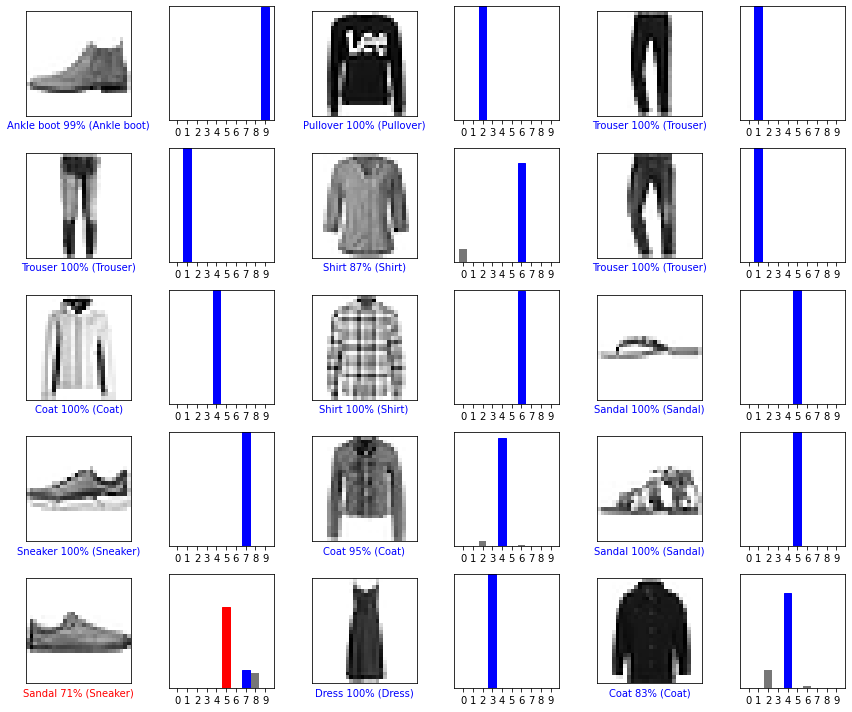

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

다음과 같은 확률로 예측값 만들어짐